City of Chicago Data Portal.

In [1]:
# Import necessary libraries
import pandas as pd

# Load a sample of the dataset (e.g., first 100,000 records)
data = pd.read_csv("Crimes_-_2001_to_Present.csv", nrows=100000)

# Display the first few rows
print("Dataset Preview:")
print(data.head())

# Check the shape of the dataset
print("\nDataset Shape:", data.shape)


Dataset Preview:
         ID Case Number                    Date                   Block  IUCR  \
0  11646166    JC213529  09/01/2018 12:01:00 AM   082XX S INGLESIDE AVE  0810   
1  11645836    JC212333  05/01/2016 12:25:00 AM     055XX S ROCKWELL ST  1153   
2  11449702    JB373031  07/31/2018 01:30:00 PM  009XX E HYDE PARK BLVD  2024   
3  11643334    JC209972  12/19/2018 04:30:00 PM  056XX W WELLINGTON AVE  1320   
4  11645527    JC212744  02/02/2015 10:00:00 AM      069XX W ARCHER AVE  1153   

         Primary Type                          Description  \
0               THEFT                            OVER $500   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2           NARCOTICS                  POSS: HEROIN(WHITE)   
3     CRIMINAL DAMAGE                           TO VEHICLE   
4  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False      True  

In [2]:
# Display column names and data types
print("\nDataset Information:")
print(data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    100000 non-null  int64  
 1   Case Number           99999 non-null   object 
 2   Date                  100000 non-null  object 
 3   Block                 100000 non-null  object 
 4   IUCR                  100000 non-null  object 
 5   Primary Type          100000 non-null  object 
 6   Description           100000 non-null  object 
 7   Location Description  98414 non-null   object 
 8   Arrest                100000 non-null  bool   
 9   Domestic              100000 non-null  bool   
 10  Beat                  100000 non-null  int64  
 11  District              100000 non-null  int64  
 12  Ward                  89532 non-null   float64
 13  Community Area        89605 non-null   float64
 14  FBI Code              100000 no

In [3]:
# Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())



Missing Values per Column:
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1586
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                    10468
Community Area          10395
FBI Code                    0
X Coordinate            34184
Y Coordinate            34184
Year                        0
Updated On                  0
Latitude                34184
Longitude               34184
Location                34184
dtype: int64


In [4]:
# Drop rows with missing 'Block' or 'Location Description'
data_clean = data.dropna(subset=['Block', 'Location Description']).reset_index(drop=True)
print("\nAfter Dropping Missing Values:", data_clean.shape)



After Dropping Missing Values: (98414, 22)


In [5]:
# Convert 'Date' to datetime
data_clean['Date'] = pd.to_datetime(data_clean['Date'])

# Extract Year, Month, DayOfWeek, Hour from 'Date'
data_clean['Year'] = data_clean['Date'].dt.year
data_clean['Month'] = data_clean['Date'].dt.month
data_clean['DayOfWeek'] = data_clean['Date'].dt.dayofweek  # Monday=0, Sunday=6
data_clean['Hour'] = data_clean['Date'].dt.hour

# Display updated columns
print("\nExtracted Temporal Features:")
print(data_clean[['Date', 'Year', 'Month', 'DayOfWeek', 'Hour']].head())


<ipython-input-5-4e358c0aa68c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_clean['Date'] = pd.to_datetime(data_clean['Date'])



Extracted Temporal Features:
                 Date  Year  Month  DayOfWeek  Hour
0 2018-09-01 00:01:00  2018      9          5     0
1 2018-07-31 13:30:00  2018      7          1    13
2 2018-12-19 16:30:00  2018     12          2    16
3 2015-02-02 10:00:00  2015      2          0    10
4 2001-01-01 11:00:00  2001      1          0    11


In [6]:
# Select relevant features
features = ['Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic',
            'Year', 'Month', 'DayOfWeek', 'Hour', 'Latitude', 'Longitude']

data_model = data_clean[features].copy()

# Encode categorical variables
# For 'Primary Type', we'll encode it as labels for classification
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_model['Primary Type Encoded'] = le.fit_transform(data_model['Primary Type'])

# Display encoded labels
print("\nEncoded Primary Types:")
print(data_model[['Primary Type', 'Primary Type Encoded']].drop_duplicates().head())



Encoded Primary Types:
         Primary Type  Primary Type Encoded
0               THEFT                    29
1           NARCOTICS                    18
2     CRIMINAL DAMAGE                     6
3  DECEPTIVE PRACTICE                     9
6       OTHER OFFENSE                    23


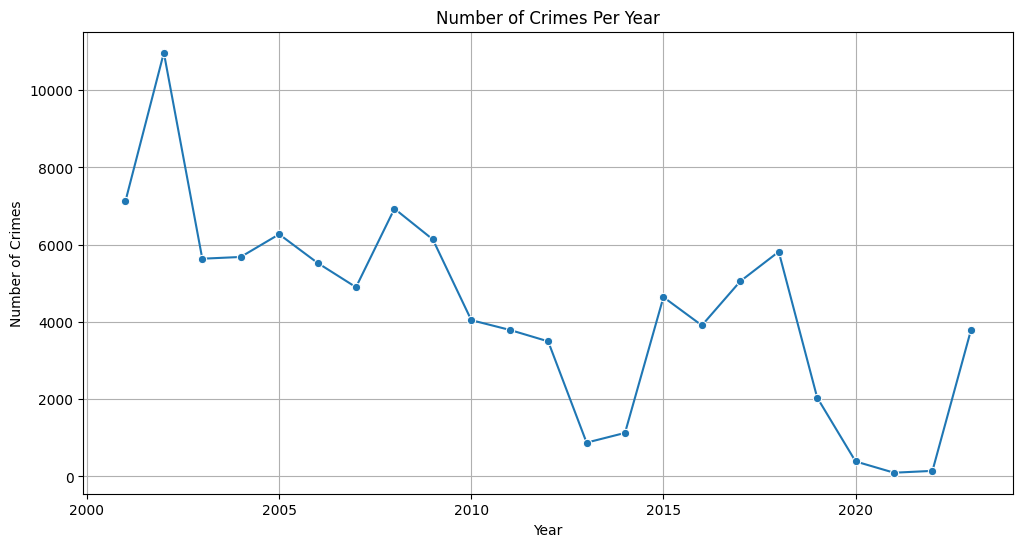

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crimes per Year
crime_per_year = data_model['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=crime_per_year.index, y=crime_per_year.values, marker='o')
plt.title("Number of Crimes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()


<ipython-input-8-b994b238b719>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_crimes.index, y=top_10_crimes.values, palette='viridis')


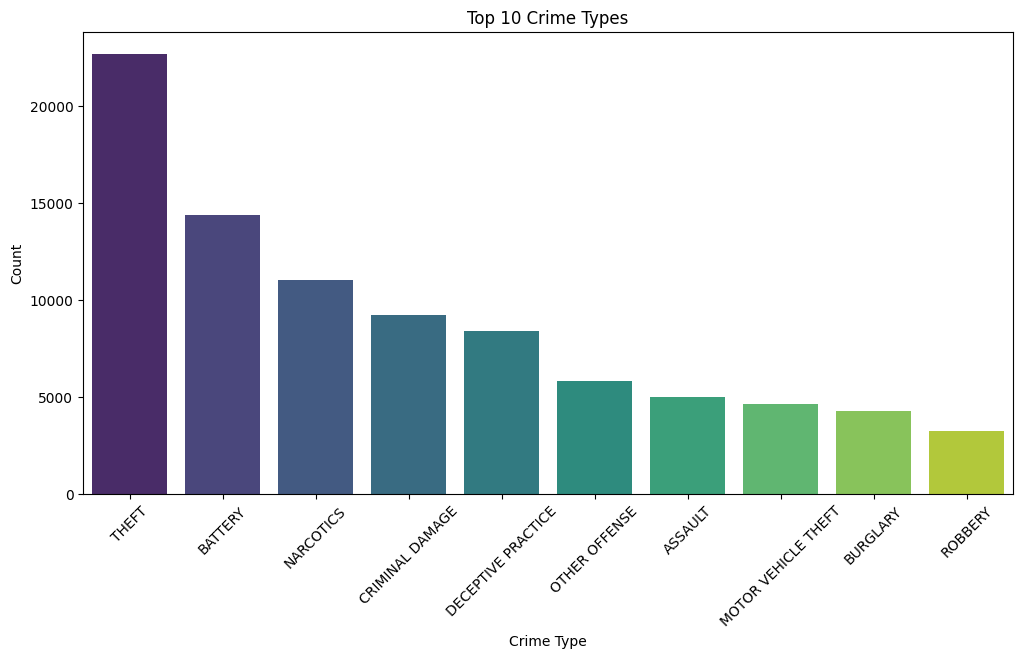

In [8]:
# Top 10 crime types
top_10_crimes = data_model['Primary Type'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_crimes.index, y=top_10_crimes.values, palette='viridis')
plt.title("Top 10 Crime Types")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-9-42388e27828f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_day.index, y=crime_day.values, palette='coolwarm')


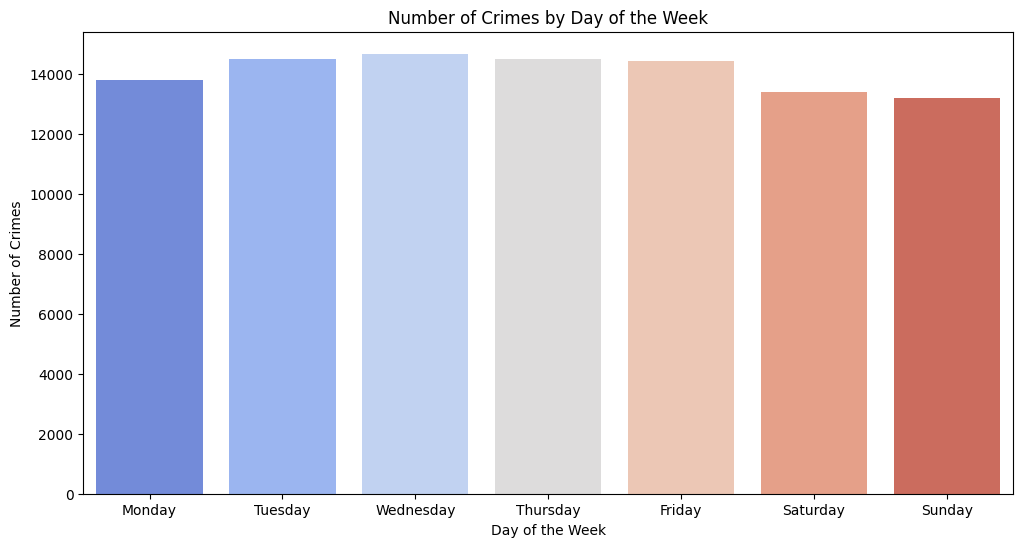

In [9]:
# Crimes per Day of the Week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_day = data_model['DayOfWeek'].value_counts().sort_index()
crime_day.index = days

plt.figure(figsize=(12, 6))
sns.barplot(x=crime_day.index, y=crime_day.values, palette='coolwarm')
plt.title("Number of Crimes by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Crimes")
plt.show()


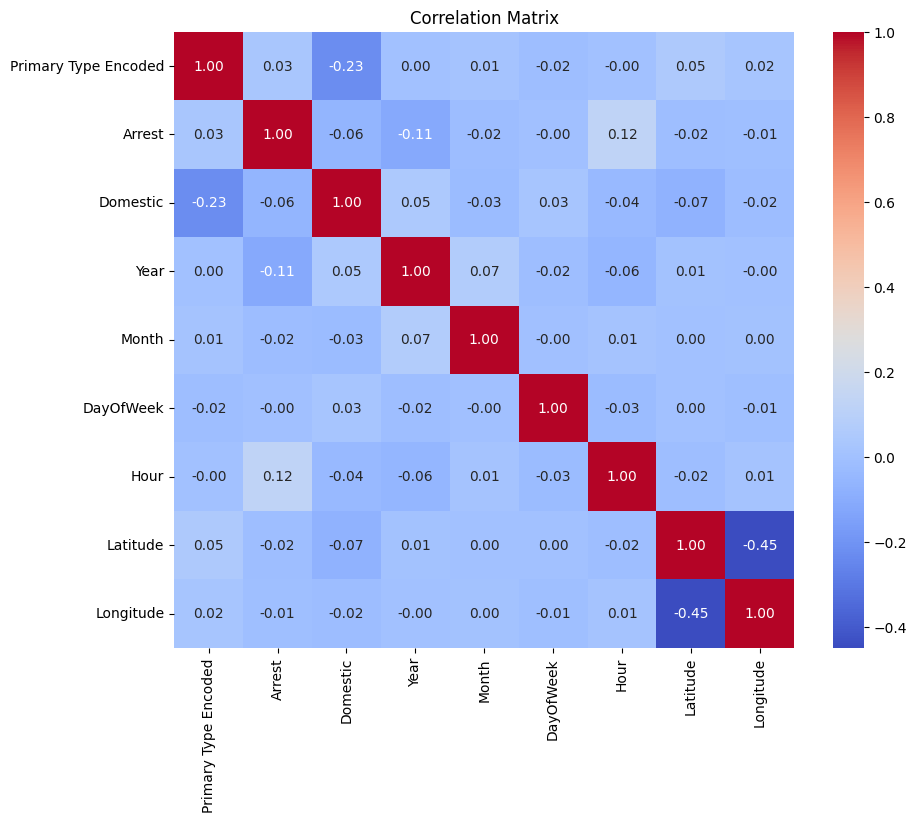

In [10]:
# Correlation Matrix
corr_matrix = data_model[['Primary Type Encoded', 'Arrest', 'Domestic', 'Year', 'Month',
                          'DayOfWeek', 'Hour', 'Latitude', 'Longitude']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


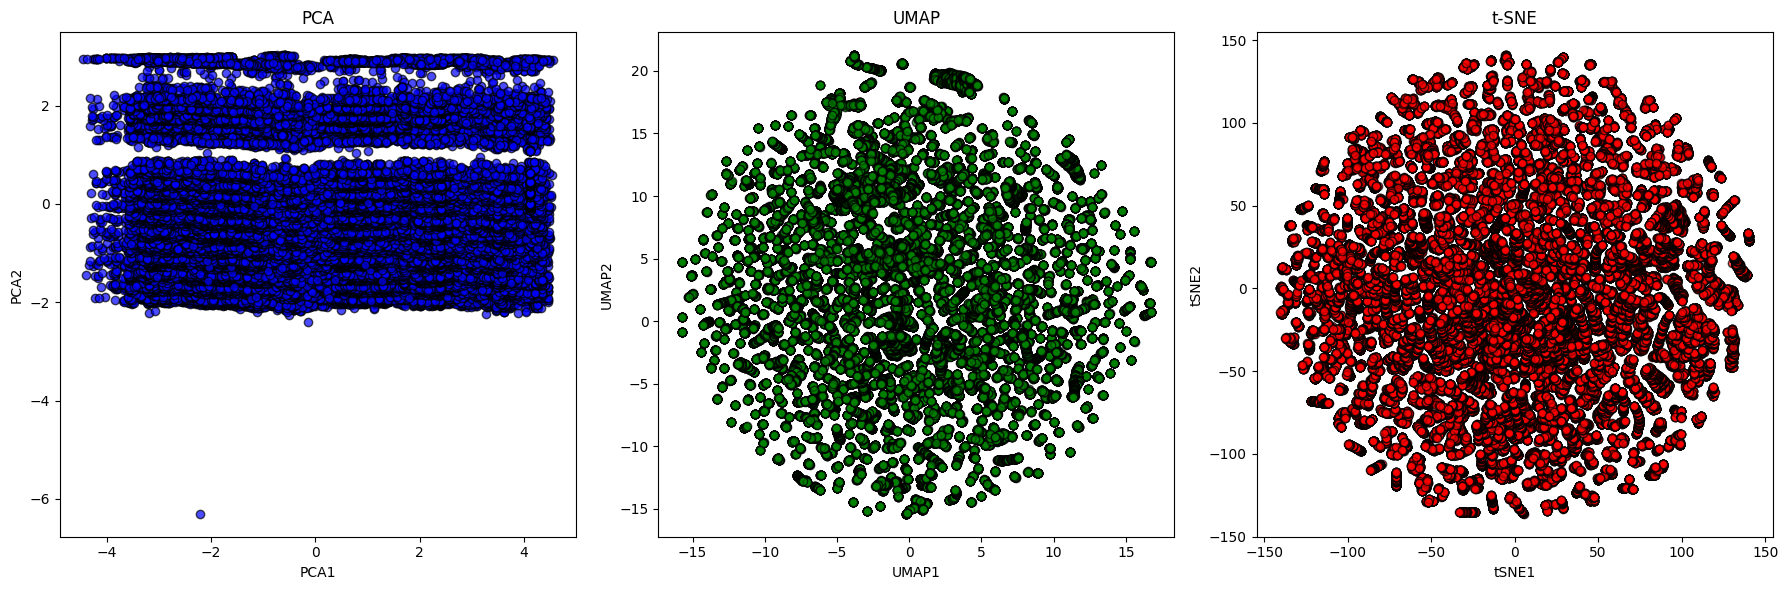

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler

# Load the Chicago Crime dataset (replace with actual dataset path)
# Example: data = pd.read_csv('chicago_crime.csv')
# For the sake of example, let's assume 'data' is loaded already
# data = pd.read_csv('chicago_crime.csv')

# Let's assume the dataset has columns such as 'crime_type', 'latitude', 'longitude', 'date', etc.
# Drop non-numerical columns and any NaN values to perform dimensionality reduction
data = data.select_dtypes(include=[np.number])  # Keep only numeric columns
data = data.dropna()  # Drop missing values

# Standardize the data (important for PCA, t-SNE, and UMAP)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA (Principal Component Analysis)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Apply UMAP (Uniform Manifold Approximation and Projection)
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
umap_result = umap_reducer.fit_transform(scaled_data)

# Apply t-SNE (t-distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Create a DataFrame for the results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
tsne_df = pd.DataFrame(tsne_result, columns=['tSNE1', 'tSNE2'])

# Plotting all results in a single figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA Plot
axes[0].scatter(pca_df['PCA1'], pca_df['PCA2'], c='blue', edgecolors='k', alpha=0.7)
axes[0].set_title('PCA')
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')

# UMAP Plot
axes[1].scatter(umap_df['UMAP1'], umap_df['UMAP2'], c='green', edgecolors='k', alpha=0.7)
axes[1].set_title('UMAP')
axes[1].set_xlabel('UMAP1')
axes[1].set_ylabel('UMAP2')

# t-SNE Plot
axes[2].scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], c='red', edgecolors='k', alpha=0.7)
axes[2].set_title('t-SNE')
axes[2].set_xlabel('tSNE1')
axes[2].set_ylabel('tSNE2')

plt.tight_layout()
plt.show()


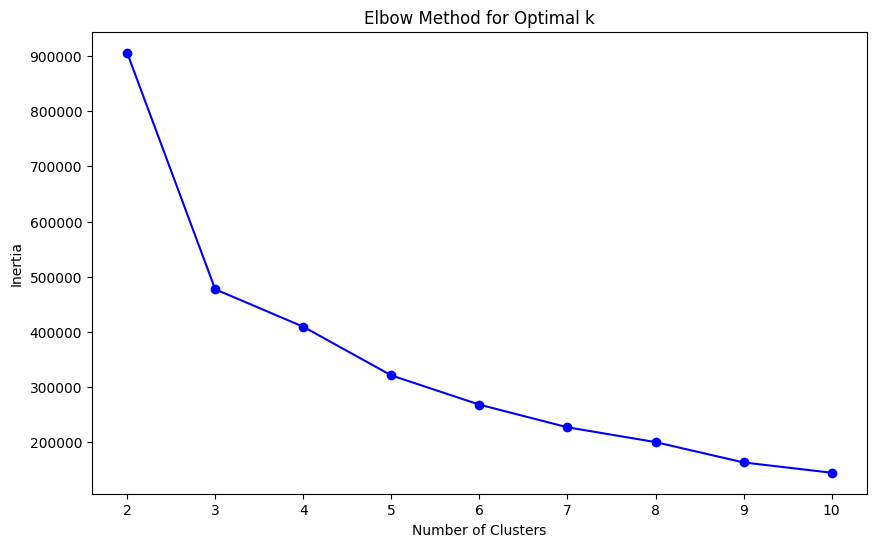

In [24]:
from sklearn.cluster import KMeans

# Features for clustering
features_cluster = ['Latitude', 'Longitude', 'Hour', 'DayOfWeek']
X_cluster = data_model[features_cluster].dropna()

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


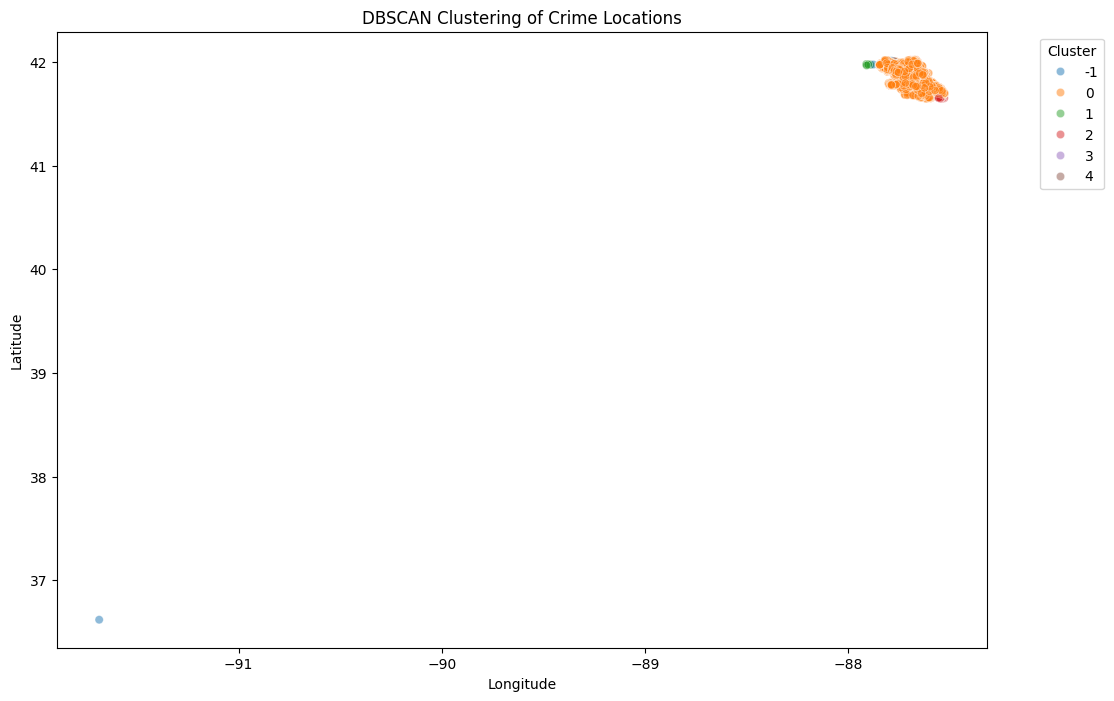

In [26]:
from sklearn.cluster import DBSCAN

# Features for DBSCAN
X_dbscan = data_model[['Latitude', 'Longitude']].dropna()

# DBSCAN Parameters
dbscan = DBSCAN(eps=0.01, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_dbscan)

# Add DBSCAN labels to the DataFrame
X_dbscan = X_dbscan.copy()
X_dbscan['DBSCAN_Cluster'] = dbscan_labels

# Plot DBSCAN clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='DBSCAN_Cluster', palette='tab10', data=X_dbscan, alpha=0.5)
plt.title("DBSCAN Clustering of Crime Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [27]:
from sklearn.model_selection import StratifiedKFold

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [29]:
# Check for missing values in the features (X)
print(X_train.isnull().sum())

# Check for missing values in the target (y)
print(y_train.isnull().sum())


Arrest           0
Domestic         0
Year             0
Month            0
DayOfWeek        0
Hour             0
Latitude     10680
Longitude    10680
dtype: int64
0


In [30]:
from sklearn.impute import SimpleImputer

# Impute missing values in the training data using the median strategy
imputer = SimpleImputer(strategy='median')  # You can change 'median' to 'mean' or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [31]:
# Drop rows with any missing values in X
X_train_clean = X_train.dropna()
X_test_clean = X_test.dropna()

# Similarly for the target variable y
y_train_clean = y_train.dropna()


In [32]:
# Impute missing values in the training and test data (if using imputation)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train your Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_imputed, y_train)  # or use X_train_clean, y_train_clean if dropping rows


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier  # Or HistGradientBoostingRegressor for regression

# Train the model with HistGradientBoosting
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)


HistGradientBoostingClassifier()

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming the data is in a pandas DataFrame 'data_model')
# Example: data_model = pd.read_csv('path_to_chicago_crime_data.csv')

# Prepare features and target
X = data_model[['Arrest', 'Domestic', 'Year', 'Month', 'DayOfWeek', 'Hour', 'Latitude', 'Longitude']]
y = data_model['Primary Type Encoded']  # Replace with your actual target column name

# Check for missing values in features (X) and target (y)
print("Missing values in features (X):\n", X.isnull().sum())
print("\nMissing values in target (y):\n", y.isnull().sum())

# Handle missing values in X using SimpleImputer (impute with median)
imputer = SimpleImputer(strategy='median')  # You can also use 'mean', 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Check if missing values were handled
print("\nMissing values after imputation in features (X):\n", pd.DataFrame(X_imputed).isnull().sum())

# If target variable 'y' contains NaNs, we drop those rows (or you can also impute)
y = y.dropna()  # Drop rows where target is missing

# Align X and y after dropping NaNs in y
X_imputed = X_imputed[y.index]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Optionally, scale the features to improve model performance (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
print("\nClassification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred))


Missing values in features (X):
 Arrest           0
Domestic         0
Year             0
Month            0
DayOfWeek        0
Hour             0
Latitude     13364
Longitude    13364
dtype: int64

Missing values in target (y):
 0

Missing values after imputation in features (X):
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00       730
           2       0.54      0.42      0.47      2081
           3       0.00      0.00      0.00       598
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00       120
           6       0.26      0.06      0.10      1321
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00       311
           9       0.25      0.18      0.21      1130
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                       param_grid,
                       cv=skf,
                       scoring='f1_weighted',
                       n_jobs=-1,
                       verbose=1)

# Fit GridSearchCV
grid_lr.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters for Logistic Regression:")
print(grid_lr.best_params_)

# Best score
print("Best F1 Score:", grid_lr.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Best Parameters for Logistic Regression:
{'C': 10, 'solver': 'liblinear'}
Best F1 Score: 0.24852938292062482


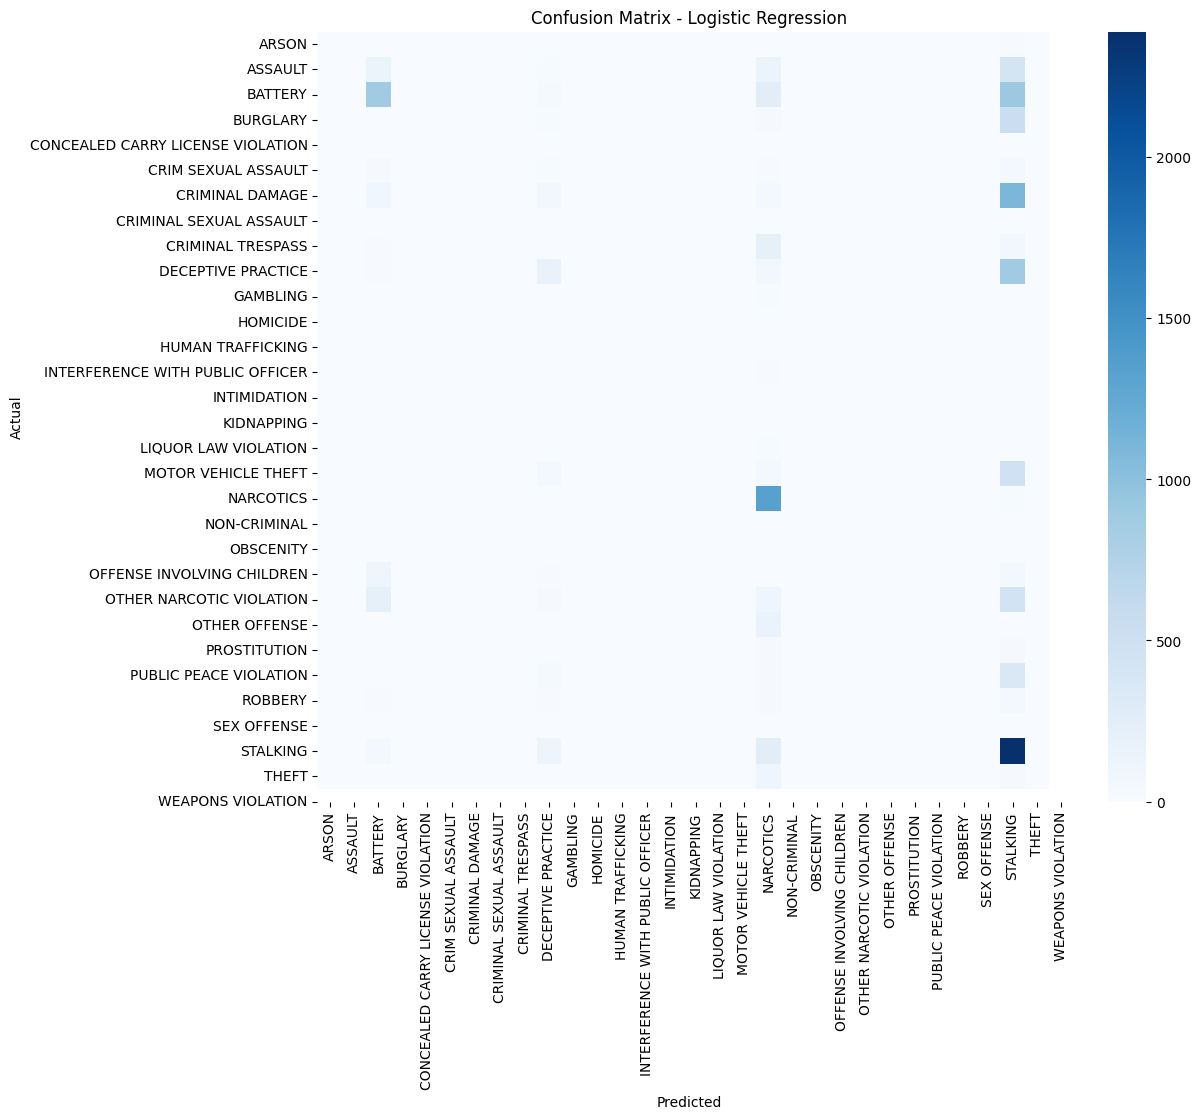

In [38]:
# Predict using the best estimator
y_pred_best = grid_lr.best_estimator_.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=False, cmap='Blues', fmt='d',
            xticklabels=le.classes_[:len(lr.classes_)],
            yticklabels=le.classes_[:len(lr.classes_)])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

# Get feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("\nFeature Scores:")
print(feature_scores)



Feature Scores:
     Feature        Score
0     Arrest  1612.688555
1   Domestic   554.123222
2       Year   118.560406
5       Hour   109.175974
6   Latitude    29.569169
7  Longitude    22.945837
3      Month     6.565219
4  DayOfWeek     5.980419


In [40]:
# Select top 6 features
selector = SelectKBest(score_func=f_classif, k=6)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", selected_features.tolist())



Selected Features: ['Arrest', 'Domestic', 'Year', 'Hour', 'Latitude', 'Longitude']


In [44]:
# Initialize and train Logistic Regression with selected features
lr_selected = LogisticRegression(max_iter=1000, random_state=42)
lr_selected.fit(X_train_selected, y_train)

# Predict on test set
y_pred_selected = lr_selected.predict(X_test_selected)

# Get the unique predicted classes
unique_classes = np.unique(y_pred_selected)

# Create a classification report using the correct labels
print("\nClassification Report (Logistic Regression - Selected Features):\n")
print(classification_report(y_test, y_pred_selected, labels=unique_classes, target_names=le.classes_[unique_classes], digits=3))



Classification Report (Logistic Regression - Selected Features):

              precision    recall  f1-score   support

   NARCOTICS      0.363     0.048     0.085      1351
       THEFT      0.217     0.998     0.356      2817

   micro avg      0.219     0.690     0.332      4168
   macro avg      0.290     0.523     0.221      4168
weighted avg      0.264     0.690     0.268      4168



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report
import numpy as np

# Initialize Ridge Classifier
ridge_clf = RidgeClassifier(alpha=1.0, random_state=42)

# Train the model
ridge_clf.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = ridge_clf.predict(X_test)

# Get unique classes from the predicted labels
unique_classes_ridge = np.unique(y_pred_ridge)

# Print the Classification Report
print("Classification Report (Ridge Classifier):\n")
print(classification_report(y_test, y_pred_ridge, labels=unique_classes_ridge, target_names=le.classes_[unique_classes_ridge], digits=3))



Classification Report (Ridge Classifier):

                    precision    recall  f1-score   support

           BATTERY      0.542     0.418     0.472      2081
   CRIMINAL DAMAGE      0.400     0.002     0.003      1321
DECEPTIVE PRACTICE      0.097     0.008     0.015      1130
         NARCOTICS      0.446     0.984     0.614      1351
             THEFT      0.295     0.886     0.442      2817

         micro avg      0.358     0.541     0.431      8700
         macro avg      0.356     0.460     0.309      8700
      weighted avg      0.368     0.541     0.354      8700



In [47]:
import xgboost as xgb
from sklearn.metrics import classification_report
import numpy as np

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_clf.predict(X_test)

# Get the unique predicted classes
unique_classes_xgb = np.unique(y_pred_xgb)

# Print the Classification Report
print("Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred_xgb, labels=unique_classes_xgb, target_names=le.classes_[unique_classes_xgb], digits=3))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:57:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost):

                                  precision    recall  f1-score   support

                           ARSON      0.167     0.053     0.080        19
                         ASSAULT      0.159     0.023     0.041       730
                         BATTERY      0.469     0.532     0.499      2081
                        BURGLARY      0.224     0.082     0.120       598
             CRIM SEXUAL ASSAULT      0.233     0.058     0.093       120
                 CRIMINAL DAMAGE      0.246     0.235     0.240      1321
         CRIMINAL SEXUAL ASSAULT      0.000     0.000     0.000        18
               CRIMINAL TRESPASS      0.392     0.193     0.259       311
              DECEPTIVE PRACTICE      0.561     0.516     0.538      1130
                        GAMBLING      0.333     0.043     0.077        23
                        HOMICIDE      1.000     0.200     0.333         5
INTERFERENCE WITH PUBLIC OFFICER      0.000     0.000     0.000        23
   

In [50]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Create a pipeline with PCA and Logistic Regression
pcr_pipeline = Pipeline([
    ('pca', PCA(n_components=5)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the pipeline
pcr_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_pcr = pcr_pipeline.predict(X_test)

# Get the unique predicted classes from the Logistic Regression model
unique_classes_pcr = np.unique(y_pred_pcr)

# Print the Classification Report
print("Classification Report (PCR - PCA + Logistic Regression):\n")
print(classification_report(y_test, y_pred_pcr, labels=unique_classes_pcr, target_names=le.classes_[unique_classes_pcr], digits=3))


Classification Report (PCR - PCA + Logistic Regression):

                    precision    recall  f1-score   support

           BATTERY      0.387     0.006     0.011      2081
DECEPTIVE PRACTICE      0.212     0.172     0.190      1130
         NARCOTICS      0.409     0.984     0.578      1351
             THEFT      0.267     0.850     0.407      2817

         micro avg      0.299     0.533     0.383      7379
         macro avg      0.319     0.503     0.297      7379
      weighted avg      0.319     0.533     0.293      7379



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
